In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
infection = "infections_cleaned.csv"
death = "deaths_cleaned2.csv"
GDP = "cia.csv"
infection = pd.read_csv(infection)
death = pd.read_csv(death)

infectiondf = pd.DataFrame(infection)
infectiondf.head()


,Austria,Italy,Portugal,Greece,Taiwan*,Indonesia,India,Mexico,Thailand,Iran
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,2,0
4,0,0,0,0,1,0,0,0,0,0


In [4]:
infectiondf = infectiondf.rename(columns={"Taiwan*":"Taiwan"})
infectiondf.head()
infe_sum_df = infectiondf.sum()
infe_sum_df

Austria       5466250
Italy        23642011
Portugal      5525459
Greece        5188890
Taiwan        7887537
Indonesia     6521292
India        44660579
Mexico        7113658
Thailand      4695203
Iran          7558142
dtype: int64

In [5]:
infection_list = [{"country": "Austria", "Infection":"5466250"},
                {"country": "Italy", "Infection":"23642011"},
                {"country": "Portugal", "Infection":"5525459"},
                {"country": "Greece ", "Infection":"5188890"},
                {"country": "Taiwan", "Infection":"7887537"},
                {"country": "Indonesia", "Infection":"6521292"},
                {"country": "India", "Infection":"44660579"},
                {"country": "Mexico", "Infection":"7113658"},
                {"country": "Thailand", "Infection":"4695203"},
                {"country": "Iran", "Infection":"7558142"},
               ]
infection_df = pd.DataFrame(infection_list)               
infection_df   

,country,Infection
0,Austria,5466250
1,Italy,23642011
2,Portugal,5525459
3,Greece,5188890
4,Taiwan,7887537
5,Indonesia,6521292
6,India,44660579
7,Mexico,7113658
8,Thailand,4695203
9,Iran,7558142


In [6]:
deathdf = pd.DataFrame(death)
deathdf.drop(columns=['Date'], inplace=True)
death_sum_df = deathdf.sum()
death_sum_df

Austria       21037.0
Italy        179436.0
Portugal      25290.0
Greece        33750.0
Taiwan*       13198.0
Indonesia    158829.0
India        530500.0
Mexico       330424.0
Thailand      32995.0
Iran         144596.0
dtype: float64

In [7]:
death_list = [{"country": "Austria", "death":"21037"},
                {"country": "Italy", "death":"179436"},
                {"country": "Portugal", "death":"25290"},
                {"country": "Greece ", "death":"33750"},
                {"country": "Taiwan", "death":"13198"},
                {"country": "Indonesia", "death":"158829"},
                {"country": "India", "death":"530500"},
                {"country": "Mexico", "death":"330424"},
                {"country": "Thailand", "death":"32995"},
                {"country": "Iran", "death":"144596"},
               ]
death_df = pd.DataFrame(death_list)               
death_df   

,country,death
0,Austria,21037
1,Italy,179436
2,Portugal,25290
3,Greece,33750
4,Taiwan,13198
5,Indonesia,158829
6,India,530500
7,Mexico,330424
8,Thailand,32995
9,Iran,144596


In [8]:
df3=pd.merge(infection_df,death_df, on="country", how='outer')
df3

,country,Infection,death
0,Austria,5466250,21037
1,Italy,23642011,179436
2,Portugal,5525459,25290
3,Greece,5188890,33750
4,Taiwan,7887537,13198
5,Indonesia,6521292,158829
6,India,44660579,530500
7,Mexico,7113658,330424
8,Thailand,4695203,32995
9,Iran,7558142,144596


In [9]:
gdpdf = pd.read_csv(GDP)
gdpdf

,country,current_health_expenditure_2019,physicians_density_per_1000_2020_to_2018,Hospital_bed_density_per_1000_2018_to_2017,geography_area_total_sq_km,real_GDP_per _capita_3year_average_2020_2018,GDP_official_exchange_rate_Billion,Population,Real_GDP_purchasing_power_parity_3year_ave
0,Austria,10.40%,5.29,7.3,"83,871","54,333",$445,"8,913,088",$483
1,Greece,7.80%,6.31,4.2,"131,957","28,733",$210,"10,533,871",$308
2,India,3%,0.74,0.5,"3,287,263","6,433","$2,836","1,389,637,446","$8,812"
3,Indonesia,2.90%,0.62,1.0,"1,904,569","11,533","$1,120","277,329,163","$3,175"
4,Iran,6.70%,1.58,1.6,"1,648,195","12,767",$581,"86,758,304","$1,033"
5,Italy,8.70%,3.95,3.1,"301,340","41,267","$2,003","61,095,551","$2,470"
6,Mexico,5.40%,2.43,1.0,"1,964,375","19,167","$1,270","129,150,971","$2,445"
7,Portugal,9.50%,5.48,3.5,"92,090","33,700",$238,"10,242,081",$347
8,Taiwan,NaN,NaN,NaN,"35,980","32,956",$611,"23,580,712","$1,128"
9,Thailand,3.80%,0.95,NaN,"513,120","17,967",$544,"69,648,117","$1,259"


In [27]:
cols_to_keep = ['country','real_GDP_per _capita_3year_average_2020_2018']
gdpdf2 = gdpdf.loc[:, cols_to_keep]
gdpdf2 = gdpdf2.rename(columns={"real_GDP_per _capita_3year_average_2020_2018":"GDP_per_Capita"})
gdpdf2['GDP_per_Capita']= gdpdf2['GDP_per_Capita'].astype('string') 
gdpdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         10 non-null     object
 1   GDP_per_Capita  10 non-null     string
dtypes: object(1), string(1)
memory usage: 288.0+ bytes


In [15]:
df4=pd.merge(df3,gdpdf2, on="country", how='outer')
df4.to_csv('df4.csv',index = False)
df5 = "df4final.csv"
final = pd.read_csv(df5)
finaldf = pd.DataFrame(final)
finaldf

,country,Infection,Infection_Perc,death,death_Perc,GDP_per_Capita,GDP_Perc
0,India,5466250,4.62,530500,36,6433,2
1,Indonesia,23642011,19.99,158829,11,11533,4
2,Iran,5525459,4.67,144596,10,12767,5
3,Thailand,5188890,4.39,32995,2,17967,7
4,Mexico,7887537,6.67,330424,22,19167,7
5,Greece,6521292,5.51,33750,2,28733,11
6,Taiwan,44660579,37.77,13198,1,32956,13
7,Portugal,7113658,6.02,25290,2,33700,13
8,Italy,4695203,3.97,179436,12,41267,16
9,Austria,7558142,6.39,21037,1,54333,21


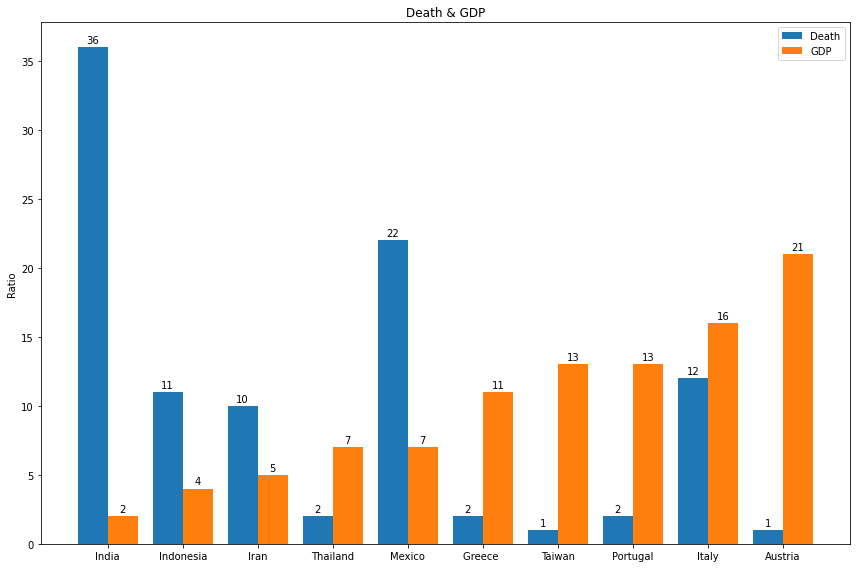

In [48]:

labels = finaldf.country
deathx = finaldf.death_Perc
gdpx = finaldf.GDP_Perc

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, deathx, width, label='Death')
rects2 = ax.bar(x + width/2, gdpx, width, label='GDP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio')
ax.set_title('Death & GDP')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

fig.tight_layout()

plt.show()

In [40]:
df55 = "simple death ratio.csv"
final55 = pd.read_csv(df55)
finaldf55 = pd.DataFrame(final55)
finaldf55

,Country,GDP_perc,Case_death_ratio
0,Austria,176.895754,38.49
1,Portugal,109.719450,45.77
2,Thailand,58.496420,70.27
3,Greece,93.548041,65.04
4,Iran,41.566416,191.31
5,Indonesia,37.548796,243.55
6,Italy,134.355862,75.90
7,Mexico,62.403344,464.49
8,India,20.944369,118.78


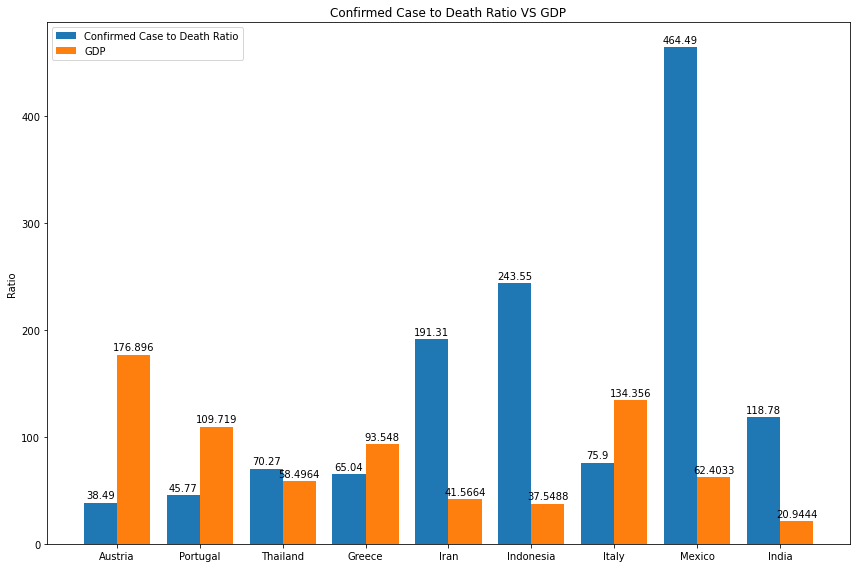

In [47]:
labels = finaldf55.Country
deathx = finaldf55.Case_death_ratio
gdpx = finaldf55.GDP_perc

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, deathx, width, label='Confirmed Case to Death Ratio')
rects2 = ax.bar(x + width/2, gdpx, width, label='GDP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio')
ax.set_title('Confirmed Case to Death Ratio VS GDP')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

fig.tight_layout()

plt.show()

The r-squared is: 0.3682882414449471


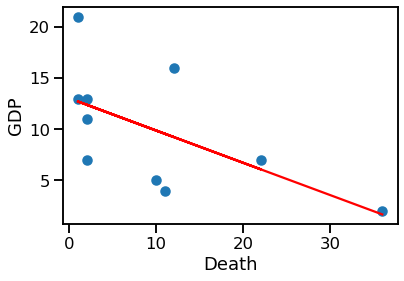

In [26]:
x_values = finaldf['death_Perc']
y_values = finaldf['GDP_Perc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Death')
plt.ylabel('GDP')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [34]:
df6 = "countries2.csv"
countries = pd.read_csv(df6)
total_country_df = pd.DataFrame(countries)
total_country_df.head()

,Country,GDP_perc,Case_death_ratio
0,Barbados,47.967260,54.15
1,Papua New Guinea,13.674234,146.65
2,Belize,22.464813,99.63
3,Qatar,289.004939,14.51
4,Lesotho,8.139425,204.70


The r-squared is: 0.14665762857808687


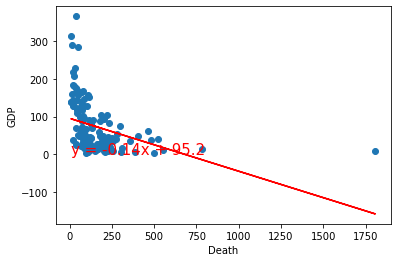

In [35]:
x_values = total_country_df['Case_death_ratio']
y_values = total_country_df['GDP_perc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Death')
plt.ylabel('GDP')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.34499134804714726


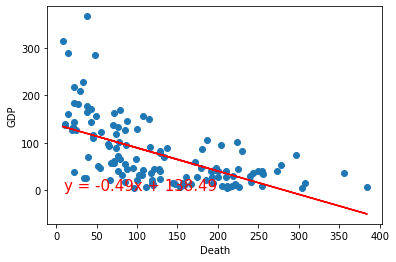

In [39]:
total_country_df2 = total_country_df.loc[total_country_df.Case_death_ratio < 400].reset_index(drop=True)

total_country_df2.head()

x_values = total_country_df2['Case_death_ratio']
y_values = total_country_df2['GDP_perc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Death')
plt.ylabel('GDP')
print(f"The r-squared is: {rvalue**2}")
plt.show()